# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18671287,
            "total_supply": 18671287,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 59682.0,
                    "volume_24h": 57027276020,
                    "market_cap": 1114101102892,
                    "percentage_change_1h": 0.353606892832999,
                    "percentage_change_24h": 1.95829274824771,
                    "percentage_change_7d": 16.0747337228319,
                    "percent_change_1h": 0.353606892832999,
                    "percent_change_24h": 1.95829274824771,
                    "percent_change_7d": 16.0747337228319
                },
                "CAD": {
                    "price": 74888.9736,
                    "volume_24h": 71557825949.896,
                    "ma

In [6]:
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]


# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $71618.40
The current value of your 5.3 ETH is $10620.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [14]:
# Format current date as ISO format
today = pd.Timestamp("2021-04-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset( tickers, timeframe, start=today, end=today,).df
df_portfolio.index = df_portfolio.index.date

# Preview DataFrame
df_portfolio.head()

AGG                                     SPY                  \
              open    high     low   close   volume   open    high     low   
2021-04-01  113.93  114.05  113.83  114.02  9491631  398.4  400.67  398.18   

                              
             close    volume  
2021-04-01  400.53  72714084

In [15]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.02
Current SPY closing price: $400.53


In [16]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20026.50
The current value of your 200 AGG shares is $22804.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Create savings DataFrame
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,82239.229
shares,42830.500


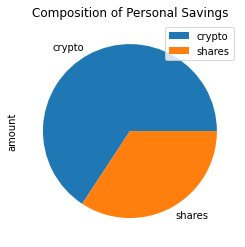

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares_value

# Validate saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                           SPY            \
              open      high       low   close    volume    open      high   
2020-03-18  109.36  110.5700  105.7707  106.33  30117292  236.25  248.3700   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320  239.25  247.3800   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412  242.53  244.4700   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510  228.19  229.6833   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498  234.42  244.1000   

                                       
               low   close     volume  
2020-03-18  228.02  241.01  298252778  
2020-03-19  232.22  241.16  261233795  
2020-03-20  228.50  228.94  302880969  
2020-03-23  218.26  222.51  280560712  
2020-03-24  233.80  243.59  211595249

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [23]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30117292          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  298252778          NaN  
2020-03-19  247.3800  232.22  241.16  261233795     0.000622  
2020-03-20  244.4700  228.50  228.94  302880969    -0.050672  
2020-03-23  229.6833  218.26  222.51  280560712    -0.028086  
2020-03-24  244.1000  233.80  243.59  211595249     0.094737

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.900672e-01,9.898792e-01,1.009204e+00,1.008854e+00,1.002580e+00,1.002443e+00,1.029747e+00,1.003074e+00,9.960648e-01,1.007597e+00,...,9.966290e-01,9.926034e-01,9.999223e-01,1.010135e+00,9.906902e-01,1.013716e+00,1.008095e+00,9.852493e-01,1.022047e+00,1.004074e+00
2,9.951142e-01,9.889567e-01,1.011304e+00,1.014780e+00,9.895610e-01,1.007162e+00,1.043406e+00,9.797486e-01,1.002185e+00,1.017892e+00,...,9.958398e-01,1.016872e+00,1.008268e+00,1.009979e+00,1.000911e+00,1.012753e+00,1.030652e+00,9.650791e-01,1.030660e+00,1.001419e+00
3,9.770538e-01,9.867399e-01,1.014296e+00,1.056293e+00,9.852579e-01,1.001581e+00,1.048248e+00,9.929899e-01,1.008331e+00,1.037500e+00,...,9.879196e-01,1.016080e+00,9.961959e-01,1.017090e+00,1.003040e+00,1.001998e+00,1.036881e+00,9.465751e-01,1.067288e+00,1.004419e+00
4,9.799201e-01,9.782632e-01,1.010649e+00,1.052125e+00,9.953036e-01,1.033595e+00,1.037864e+00,1.012007e+00,1.004721e+00,1.066579e+00,...,1.004143e+00,1.011810e+00,1.009697e+00,1.046729e+00,1.002993e+00,9.883837e-01,1.020501e+00,9.399494e-01,1.090083e+00,1.007488e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.733051e+08,1.669835e+08,5.609602e+08,5.776305e+08,6.139625e+08,9.555138e+07,1.323654e+08,1.343862e+09,7.947769e+06,3.680151e+08,...,4.420434e+08,2.335977e+08,1.241302e+08,1.753915e+08,3.612987e+08,2.969789e+08,1.569002e+09,4.569699e+08,4.167429e+08,2.036177e+08
7557,1.741624e+08,1.673680e+08,5.637332e+08,5.835763e+08,6.234978e+08,9.584602e+07,1.307452e+08,1.357679e+09,8.265687e+06,3.731414e+08,...,4.424898e+08,2.315085e+08,1.225441e+08,1.756011e+08,3.630926e+08,3.000590e+08,1.552129e+09,4.690519e+08,4.099336e+08,2.047490e+08
7558,1.755008e+08,1.692651e+08,5.632891e+08,5.713822e+08,6.273854e+08,9.569801e+07,1.275538e+08,1.340495e+09,8.197068e+06,3.693110e+08,...,4.493248e+08,2.300145e+08,1.216521e+08,1.774868e+08,3.668632e+08,3.000078e+08,1.524364e+09,4.747015e+08,4.178181e+08,1.998430e+08
7559,1.766536e+08,1.717851e+08,5.649169e+08,5.679948e+08,6.172143e+08,9.472033e+07,1.276863e+08,1.359962e+09,8.209210e+06,3.720421e+08,...,4.511896e+08,2.286489e+08,1.247385e+08,1.788169e+08,3.641251e+08,3.001960e+08,1.537579e+09,4.914203e+08,4.122820e+08,2.059157e+08


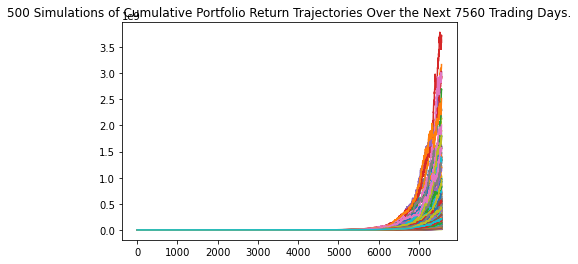

In [25]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

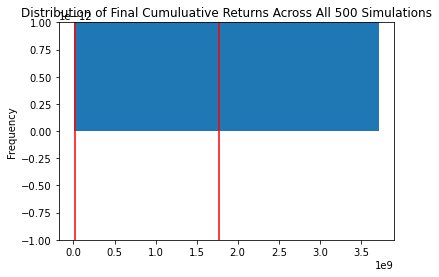

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           5.000000e+02
mean            3.421439e+08
std             4.759604e+08
min             8.246872e+06
25%             9.046491e+07
50%             1.871624e+08
75%             4.024602e+08
max             3.714966e+09
95% CI Lower    2.170105e+07
95% CI Upper    1.774647e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $434021015977.04 and $35492934349460.51


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $651031523965.55 and $53239401524190.76


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30117292          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  298252778          NaN  
2020-03-19  247.3800  232.22  241.16  261233795     0.000622  
2020-03-20  244.4700  228.50  228.94  302880969    -0.050672  
2020-03-23  229.6833  218.26  222.51  280560712    -0.028086  
2020-03-24  244.1000  233.80  243.59  211595249     0.094737

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006670,1.003940,0.986923,1.016770,0.992233,1.006666,1.018281,1.001105,0.994435,0.972475,...,1.015105,1.017917,1.019975,0.991049,1.010404,1.002645,1.008129,1.017814,0.992993,0.998139
2,1.003404,0.993407,0.989985,1.013899,0.973714,1.032313,1.025065,0.982466,0.987825,0.986767,...,1.015192,1.028972,1.016673,1.013343,1.018928,1.005143,1.015540,1.027605,0.987977,1.001040
3,0.990225,0.995529,0.988376,1.020248,0.979963,1.021993,1.033832,0.981001,0.985402,0.956651,...,1.013241,1.029819,1.011599,1.024569,1.034193,1.007934,1.017428,1.042090,1.003033,1.014457
4,1.007506,0.995340,0.968891,1.013836,0.972857,1.048372,1.031428,0.970457,0.997591,0.958106,...,1.032261,1.045406,1.019995,1.015392,1.051734,0.997289,1.005682,1.056154,1.010027,1.038177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,13.622208,46.921473,14.860996,24.462880,18.988088,19.484639,16.929138,31.795488,24.948496,39.337991,...,16.662059,12.300024,13.661702,31.332398,18.936863,19.340460,8.737004,27.248022,20.174325,36.706483
1257,13.871461,47.217006,15.135502,24.428803,19.138210,19.276900,17.077720,31.476343,25.433042,40.039909,...,16.665498,12.396547,13.431967,31.482216,18.860474,19.049078,8.649472,27.519777,20.066891,37.287421
1258,14.072854,47.416974,15.140696,24.167558,19.008409,19.478756,17.114063,31.855271,25.808977,40.049116,...,16.463055,12.426481,13.252143,31.293966,18.989371,18.845048,8.584103,27.938168,19.874431,37.074226
1259,14.156795,47.942109,14.757899,23.597935,19.312807,19.445423,17.334102,31.979230,25.817233,40.490318,...,16.077966,12.415984,13.575791,30.974980,19.100117,18.926141,8.840577,27.687800,20.105495,36.367295


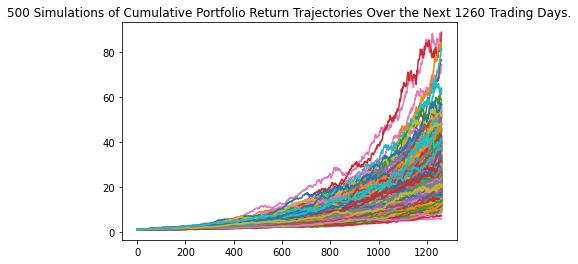

In [32]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

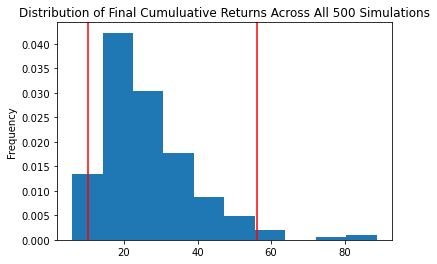

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean             26.256874
std              12.496456
min               5.866443
25%              17.695750
50%              23.110541
75%              32.446431
max              88.694044
95% CI Lower     10.049899
95% CI Upper     56.179255
Name: 1260, dtype: float64


In [44]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 30000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*50000,2)
ci_upper_five = round(even_tbl_five[9]*50000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $502494.94 and $2808962.76


### Ten Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low   close    volume daily_return    open   
2020-03-18  109.36  110.5700  105.7707  106.33  30117292          NaN  236.25   
2020-03-19  106.47  109.2200  105.5600  108.97  21031320     0.024828  239.25   
2020-03-20  108.46  110.2399  108.4600  109.49  28449412     0.004772  242.53   
2020-03-23  109.90  112.9400  109.0000  112.55  23873510     0.027948  228.19   
2020-03-24  111.52  113.5000  111.0754  113.29  18141498     0.006575  234.42   

                                                              
                high     low   close     volume daily_return  
2020-03-18  248.3700  228.02  241.01  298252778          NaN  
2020-03-19  247.3800  232.22  241.16  261233795     0.000622  
2020-03-20  244.4700  228.50  228.94  302880969    -0.050672  
2020-03-23  229.6833  218.26  222.51  280560712    -0.028086  
2020-03-24  244.1000  233.80  243.59  211595249     0.094737

In [46]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003571,0.995304,0.983351,0.979064,1.027327,0.999920,0.992860,0.983538,1.007867,1.016844,...,0.993049,1.024132,1.001681,1.017682,1.011086,0.985714,1.013900,0.988831,1.009862,1.008640
2,1.013980,0.994823,0.983421,0.970349,1.022571,0.979443,0.987010,0.980384,1.030188,1.025124,...,0.976420,1.045292,1.027659,1.043052,1.012152,0.986382,1.012488,1.020169,1.013506,1.012362
3,1.029822,0.998937,0.992006,0.979801,1.020021,0.993864,0.976036,0.979497,1.053584,1.017176,...,0.978559,1.028814,1.012637,1.030565,1.008068,0.973221,1.019029,1.022500,1.009863,1.025250
4,1.025773,1.022622,1.013708,0.987921,1.037923,0.981356,0.986524,0.983814,1.054255,1.010746,...,0.985210,1.040104,1.031394,1.035304,1.018657,0.959897,0.989588,1.038559,1.022107,1.002253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1152.275541,288.350663,418.190522,1142.388666,958.922765,446.575269,472.256115,518.910851,384.493008,966.813421,...,658.675984,1052.196072,443.745013,250.262425,437.963853,802.052344,394.424714,2937.891594,667.416055,334.765557
2517,1157.462806,294.312263,422.072917,1152.213250,967.985482,436.186922,466.338247,514.965385,384.114840,971.569203,...,666.156275,1045.465452,438.342469,251.540901,445.681756,807.930374,391.074989,2952.872424,674.677455,339.974841
2518,1170.236088,294.492627,417.733453,1135.273575,953.389856,433.564375,461.103455,510.986190,386.129994,979.625944,...,675.729554,1044.951068,438.723941,252.682999,451.290458,801.893108,391.823386,2955.837867,695.453232,341.356303
2519,1153.394430,296.592524,421.206199,1136.431004,947.885141,426.323076,464.755128,510.357017,380.682572,980.017921,...,666.953106,1022.049642,446.620354,258.595191,455.048846,801.743890,387.209180,2948.585569,707.421316,337.932333


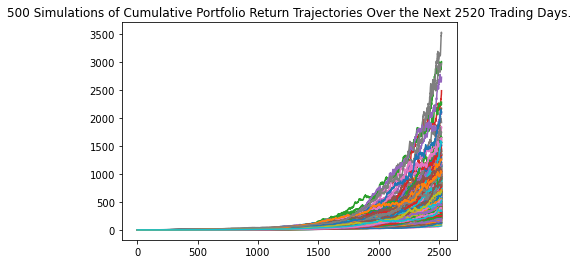

In [47]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()


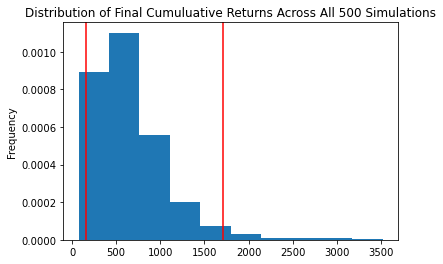

In [48]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count            500.000000
mean             671.462810
std              441.353251
min               72.877479
25%              376.251218
50%              558.441162
75%              857.309209
max             3523.442268
95% CI Lower     162.787137
95% CI Upper    1708.494710
Name: 2520, dtype: float64


In [51]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $9767228.22 and $102509682.62
